# Simulacion de transito de vehiculos para la determinar los indices de contaminacion bajo distintos criterios de conduccion

Importamos librerias

In [58]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import scipy.stats as st
import math
from random import randint, uniform,random
import random
from random import choice
import csv

Se define una funcion para acomodar los autos de forma regular en la cuadricula que representara las calles de la region de simulacion

In [59]:
def puntosiniciales (nautos, tamcalles, ncalles, dursimu, duritera, aprom, velmax, espminimo):
    duracionsimulacion = dursimu
    duraciondeiteracion = duritera
    aceleracionpromedio = aprom
    x0 = []
    y0 = []
    a0 = []
    v0 = []    
    dir0 = []
    niteraciones = duracionsimulacion * 60 * (1 / duraciondeiteracion)
    s = (int(niteraciones + 1), nautos)
    ss = (3, 1)

    sequence1 = [1, 3]
    sequence2 = [2, 4]

    tamcaja = (ncalles + 1) * tamcalles
    vmax = velmax * (1 / 3600) * (1000) # Velocidad en m/s
    

    for i in range(0, int(ncalles)):
        for j in range(0, int(nautos/2/ncalles)):
            x0.append(tamcalles*ncalles/(nautos/2/ncalles)*(j+1)-tamcalles/2)
            y0.append(tamcalles*(i+1))
            dir0.append(choice(sequence2))
            v0.append(np.random.rand())
            a0.append(np.random.rand())

    y2 = np.arange(tamcalles/2, tamcalles*(ncalles-1)+tamcalles/2,(tamcalles*(ncalles)-tamcalles)/(nautos/2))
    x2 =  np.arange(tamcalles, tamcalles*(ncalles+1), tamcalles)

    for i in range(0, int(ncalles)):
        for j in range(0, int(nautos/2/ncalles)):
            y0.append(tamcalles*ncalles/(nautos/2/ncalles)*(j+1)-tamcalles/2)
            x0.append(tamcalles*(i+1))
            dir0.append(choice(sequence1))
            v0.append(np.random.rand())
            a0.append(np.random.rand())

    return x0, y0, v0, a0, dir0

Se definen  los parametros iniciales y se calculan las posiciones, velocidades, aceleraciones y direccion inicial de cada auto

In [60]:
# Parametros iniciales

tamcalles = 50
nautos = 200
ncalles = 10 # No mover de 20

dursimu = 4 # minutos

duritera = 0.2 # segs
duraciondeiteracion = duritera
aprom = 1 # m/s2
espminimo = 6 # m

vmax = 10 # km/h

vmax=vmax*(1/3600)*(1000)
aceleracionpromedio=1

niteraciones = dursimu * 60 * (1 / duritera)

posicionx = np.arange(niteraciones*nautos)
posiciony = np.arange(niteraciones*nautos)
velocidad = np.arange(niteraciones*nautos)
aceleracion = np.arange(niteraciones*nautos)
direccion = np.arange(niteraciones*nautos)
tipodecalle = np.arange(niteraciones*nautos)

posicionx.shape = (int(niteraciones),int(nautos))
posiciony.shape = (int(niteraciones),int(nautos))
velocidad.shape = (int(niteraciones),int(nautos))
aceleracion.shape = (int(niteraciones),int(nautos))
direccion.shape = (int(niteraciones),int(nautos))
tipodecalle.shape = (int(niteraciones),int(nautos))

x0, y0, v0, a0, dir0 = puntosiniciales (nautos, tamcalles, ncalles, dursimu, duritera, aprom, vmax, espminimo)

for i in range(0, int(nautos)-1):
    posicionx[0][i] = x0[i]
    posiciony[0][i] = y0[i]
    direccion[0][i] = dir0[i]
    velocidad[0][i] = v0[i]
    aceleracion[0][i] = a0[i]

Se grafica la posicion inicial de cada auto

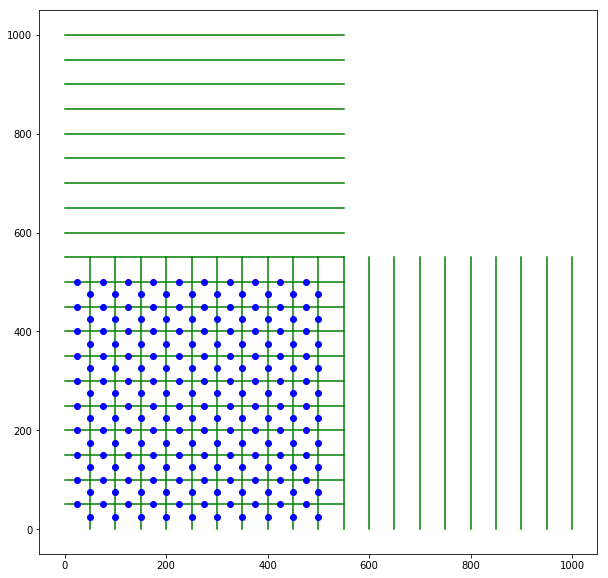

In [61]:

x1 = np.linspace(0, tamcalles * ncalles+tamcalles, 2)
y1 = [tamcalles, tamcalles]
y2 = [tamcalles*2, tamcalles*2]
y3 = [tamcalles*3, tamcalles*3]
y4 = [tamcalles*4, tamcalles*4]
y5 = [tamcalles*5, tamcalles*5]
y6 = [tamcalles*6, tamcalles*6]
y7 = [tamcalles*7, tamcalles*7]
y8 = [tamcalles*8, tamcalles*8]
y9 = [tamcalles*9, tamcalles*9]
y10 = [tamcalles*10, tamcalles*10]
y11 = [tamcalles*11, tamcalles*11]
y12 = [tamcalles*12, tamcalles*12]
y13 = [tamcalles*13, tamcalles*13]
y14 = [tamcalles*14, tamcalles*14]
y15 = [tamcalles*15, tamcalles*15]
y16 = [tamcalles*16, tamcalles*16]
y17 = [tamcalles*17, tamcalles*17]
y18 = [tamcalles*18, tamcalles*18]
y19 = [tamcalles*19, tamcalles*19]
y20 = [tamcalles*20, tamcalles*20]
y21 = [tamcalles*21, tamcalles*21]


plt.figure(figsize=(10, 10))
plt.plot(x1,y1, color = 'g')
plt.plot(x1,y2, color = 'g')
plt.plot(x1,y3, color = 'g')
plt.plot(x1,y4, color = 'g')
plt.plot(x1,y5, color = 'g')
plt.plot(x1,y6, color = 'g')
plt.plot(x1,y7, color = 'g')
plt.plot(x1,y8, color = 'g')
plt.plot(x1,y9, color = 'g')
plt.plot(x1,y10, color = 'g')
plt.plot(x1,y11, color = 'g')
plt.plot(x1,y12, color = 'g')
plt.plot(x1,y13, color = 'g')
plt.plot(x1,y14, color = 'g')
plt.plot(x1,y15, color = 'g')
plt.plot(x1,y16, color = 'g')
plt.plot(x1,y17, color = 'g')
plt.plot(x1,y18, color = 'g')
plt.plot(x1,y19, color = 'g')
plt.plot(x1,y20, color = 'g')

plt.plot(y1,x1, color = 'g')
plt.plot(y2,x1, color = 'g')
plt.plot(y3,x1, color = 'g')
plt.plot(y4,x1, color = 'g')
plt.plot(y5,x1, color = 'g')
plt.plot(y6,x1, color = 'g')
plt.plot(y7,x1, color = 'g')
plt.plot(y8,x1, color = 'g')
plt.plot(y9,x1, color = 'g')
plt.plot(y10,x1, color = 'g')
plt.plot(y11,x1, color = 'g')
plt.plot(y12,x1, color = 'g')
plt.plot(y13,x1, color = 'g')
plt.plot(y14,x1, color = 'g')
plt.plot(y15,x1, color = 'g')
plt.plot(y16,x1, color = 'g')
plt.plot(y17,x1, color = 'g')
plt.plot(y18,x1, color = 'g')
plt.plot(y19,x1, color = 'g')
plt.plot(y20,x1, color = 'g')

plt.plot(x0,y0, "bo")

Se ejecuta la simulacion. Este codigo mueve los autos de acuerdo a los parametros de entrada establecidos anteriormente. Cada calle es de doble sentido y de un solo carril para cada sentido de simulacion. Los autos evitan revasar a un auto que va frente a ellos con una menor velocidad; las calles verticales tienen preferencia de circulacion, por lo tanto, los autos que se mueven en direccion oeste o este deben frenar en las esquinas hasta que no este pasando un auto en la calle perpenduclar a su recorrido. Los autos de mueven de acuerdo a un movimiento de "Vuelo de Levy", que consiste en recorrer pocos tramos largos y una cantidad mayor de tramos cortos en determinado lapso de tiempo.

In [1]:


tamcaja = tamcalles*ncalles
u=[]
ua=[]
ub=[]
  
for i in range(0, int(niteraciones-1)):
    for j in range(0, int(nautos)):
        if ((direccion[i][j] == 1 or direccion[i][j]==3 ) and np.mod(posicionx[i][j],tamcalles)==0):
            tipodecalle[i][j]=1
        else:
             tipodecalle[i][j]=2
        
        if velocidad[i][j] < 0:
            velocidad[i][j] = 0
        if velocidad[i][j] > vmax:
            velocidad[i][j] = vmax
        
########################################################################################################        
        if direccion[i][j] == 1: # SI EL AUTO SE MUEVE ENDIRECCION NORTE
            u=np.array([tamcalles*100,0,0])
            ua=np.array([tamcalles*100,0,0])
            ub=np.array([tamcalles*100,0,0])  
            
            for k in range(0, int(nautos)): # DISTANCIA CIRCULAR
                if direccion[i][k] == 2: # verificar que esten en direcciones perpendiculares(VER. DIRECCION ESTE)
                    if posiciony[i][k] - posiciony[i][j] > 0: # verificar que esten cerca hacia arriba
                        if posiciony[i][k] - posiciony[i][j] < 10: # verificar que se encuentre al menos a 10 m hacia arriba
                            if posicionx[i][j]-posicionx[i][k] < 7: # verificar que esten al menos 7 m separados horizontalmente
                                if posicionx[i][j]-posicionx[i][k] > 0:
                                    ua[1] = posicionx[i][j] - posicionx[i][k] # guardar el valor de esa distancia de lado
                                    if ua[1] <= ua[0]: # verificar que esa distancia sea menor que la iteracion pasada
                                        ua[0] = ua[1] #  la distancia menor se va  guardando en ua(1,1)
                                        ua[2] = posiciony[i][k]-posiciony[i][j]
                if direccion[i][k] == 4: #verificar que esten en direcciones perpendiculares (VER. DIRECCION OESTE)
                    if posiciony[i][k]-posiciony[i][j]>0: #verificar que esten cerca hacia arriba
                        if posiciony[i][k]-posiciony[i][j]<10: # verificar que se encuentre al menos a 10 m hacia arriba
                            if posicionx[i][k]-posicionx[i][j]<7: #verificar que esten al menos 7 m separados horizontalmente
                                if posicionx[i][k]-posicionx[i][j]>0: #
                                    ub[1]=posicionx[i][k]-posicionx[i][j]# guardar el valor de esa distancia de lado
                                    if ub[1]<ub[0]: #verificar que esa distancia sea menor que la iteracion pasada
                                        ub[0]=ub[1] # la distancia menor se va  guardando en ub(1,1)
                                        ub[2]=posiciony[i][k]-posiciony[i][j] #la distancia vertical entre los autos se guarda
                                

            for k in range(0, int(nautos)):     #DETERMINAR DISTANCIA DE AUTO DE FRENTE
                if direccion[i][k] == 1: # verificar cuales estan en la misma direccion
                    if abs(posicionx[i][j] - posicionx[i][k]) < 1 : #verificar que esten en la misma coordenada X
                        if posiciony[i][k] - posiciony[i][j] > 0: #verificar que se encuentre en frente
                            u[1]=posiciony[i][k] - posiciony[i][j]
                            if u[1]<= u[0] and u[1] > 0:
                                u[0]=u[1]
                                u[2]=velocidad[i][k]
            
            distanciacirculo=min(ua[0],ub[0])
            
            if distanciacirculo<0:
                distanciacirculo =100
            if min(ua[0],ub[0])== ua[0]:
                ud= ua[2]
            if min(ua[0],ub[0])== ub[0]:
                ud= ub[2]
                
            distanciafrente=u[0]         
            distanciaesquina=tamcalles-np.mod(posiciony[i][j],tamcalles)
            er=i
            posiciony[i+1][j]=posiciony[i][j]+velocidad[i][j]*duraciondeiteracion+(aceleracion[i][j]*duraciondeiteracion**2)/2
                    
            #if posiciony[i+1][j]<posiciony[i][j]:
                #posiciony[i+1][j]=posiciony[i][j]
                
            if posiciony[i+1][j]>=tamcaja+tamcalles/2:
                posiciony[i+1][j]=tamcalles/2
  
            
            posicionx[i+1][j]=posicionx[i][j]
            
            if tipodecalle[i][j]==1 :
                if distanciafrente<espminimo :
                    velocidad[i+1][j]=u[2]
                    aceleracion[i+1][j]=0
                if distanciafrente>=espminimo :
                    aceleracion[i+1][j]=aceleracionpromedio
                    velocidad[i+1][j]=velocidad[i][j]+aceleracionpromedio*duraciondeiteracion

            if tipodecalle[i][j]==2 :
                if min(distanciacirculo,distanciafrente)==distanciafrente :
                    if distanciafrente<espminimo :
                        velocidad[i+1][j]=u[2]
                        aceleracion[i+1][j]=0
                    if distanciafrente>=espminimo :
                        aceleracion[i+1][j]=aceleracionpromedio
                        velocidad[i+1][j]=velocidad[i][j]+aceleracionpromedio*duraciondeiteracion

                if min(distanciacirculo,distanciafrente)== distanciacirculo :
                    if distanciaesquina<=14 and distanciaesquina >5 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-.5)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=5 and distanciaesquina >3 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-2)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=3 and distanciaesquina >.5 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-4)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=.5 and distanciaesquina >0 :
                        aceleracion[i+1][j]=0
                        velocidad[i+1][j]=0
                  
            direccion[i+1][j]=direccion[i][j]
            if distanciaesquina<0.5 :
                m=np.random.rand()
                if m>=.5 :
                    direccion[i+1][j]= 1
                    posicionx[i+1][j]=posicionx[i][j]
              
                if m<.5 and m>=.25 :
                    direccion[i+1][j]= 2
                    posicionx[i+1][j]=posicionx[i][j]
                    posiciony[i+1][j]=int((np.mod(posiciony[i][j],1)-1)*(-1)+posiciony[i][j])
                    velocidad[i+1][j]=2
              
                if m<.25 and m>=0 :
                    direccion[i+1][j]= 4
                    posicionx[i+1][j]=posicionx[i][j]
                    posiciony[i+1][j]=int((np.mod(posiciony[i][j],1)-1)*(-1)+posiciony[i][j])
                    velocidad[i+1][j]=2
                    
########################################################################################################        
        if direccion[i][j] == 3: # SI EL AUTO SE MUEVE ENDIRECCION SUR
            u=np.array([tamcalles*100,0,0])
            ua=np.array([tamcalles*100,0,0])
            ub=np.array([tamcalles*100,0,0])
            
            for k in range(0, int(nautos)): # DISTANCIA CIRCULAR
                if direccion[i][k] == 2: # verificar que esten en direcciones perpendiculares(VER. DIRECCION ESTE)
                    if posiciony[i][j] - posiciony[i][k] > 0: # verificar que esten cerca hacia arriba
                        if posiciony[i][j] - posiciony[i][k] < 10: # verificar que se encuentre al menos a 10 m hacia arriba
                            if posicionx[i][j]-posicionx[i][k] < 7: # verificar que esten al menos 7 m separados horizontalmente
                                if posicionx[i][j]-posicionx[i][k] > 0:
                                    ua[1] = posicionx[i][j] - posicionx[i][k] # guardar el valor de esa distancia de lado
                                    if ua[1] <= ua[0]: # verificar que esa distancia sea menor que la iteracion pasada
                                        ua[0] = ua[1] #  la distancia menor se va  guardando en ua(1,1)
                                        ua[2] = -posiciony[i][k]+posiciony[i][j]
                if direccion[i][k] == 4: #verificar que esten en direcciones perpendiculares (VER. DIRECCION OESTE)
                    if posiciony[i][j]-posiciony[i][k]>0: #verificar que esten cerca hacia arriba
                        if posiciony[i][j]-posiciony[i][k]<10: # verificar que se encuentre al menos a 10 m hacia arriba
                            if posicionx[i][k]-posicionx[i][j]<7: #verificar que esten al menos 7 m separados horizontalmente
                                if posicionx[i][k]-posicionx[i][j]>0: #
                                    ub[1]=posicionx[i][k]-posicionx[i][j]# guardar el valor de esa distancia de lado
                                    if ub[1]<ub[0]: #verificar que esa distancia sea menor que la iteracion pasada
                                        ub[0]=ub[1] # la distancia menor se va  guardando en ub(1,1)
                                        ub[2]=-posiciony[i][k]+posiciony[i][j] #la distancia vertical entre los autos se guarda
                                

            for k in range(0, int(nautos)):     #DETERMINAR DISTANCIA DE AUTO DE FRENTE
                if direccion[i][k] == 3: # verificar cuales estan en la misma direccion
                    if abs(posicionx[i][k] - posicionx[i][j]) < 1 : #verificar que esten en la misma coordenada X
                        if posiciony[i][j] - posiciony[i][k] > 0: #verificar que se encuentre en frente
                            u[1]=posiciony[i][j] - posiciony[i][k]
                            if u[1]<= u[0] and u[1] > 0:
                                u[0]=u[1]
                                u[2]=velocidad[i][k]
            
            distanciacirculo=min(ua[0],ub[0])
            
            if distanciacirculo<0:
                distanciacirculo =100
            if min(ua[0],ub[0])== ua[0]:
                ud= ua[2]
            if min(ua[0],ub[0])== ub[0]:
                ud= ub[2]
                
            distanciafrente=u[0]         
            distanciaesquina=np.mod(posiciony[i][j],tamcalles)
            er=i
            posiciony[i+1][j]=posiciony[i][j]-(velocidad[i][j]*duraciondeiteracion+(aceleracion[i][j]*duraciondeiteracion**2)/2)
                    
            #if posiciony[i+1][j]>posiciony[i][j]:
               # posiciony[i+1][j]=posiciony[i][j]

            if posiciony[i+1][j]<=tamcalles/2:
                posiciony[i+1][j]=tamcaja+tamcalles/2    
            
            posicionx[i+1][j]=posicionx[i][j]
            
            if tipodecalle[i][j]==1 :
                if distanciafrente<espminimo :
                    velocidad[i+1][j]=u[2]
                    aceleracion[i+1][j]=0
                if distanciafrente>=espminimo :
                    aceleracion[i+1][j]=aceleracionpromedio
                    velocidad[i+1][j]=velocidad[i][j]+aceleracionpromedio*duraciondeiteracion

            if tipodecalle[i][j]==2 :
                if min(distanciacirculo,distanciafrente)==distanciafrente :
                    if distanciafrente<espminimo :
                        velocidad[i+1][j]=u[2]
                        aceleracion[i+1][j]=0
                    if distanciafrente>=espminimo :
                        aceleracion[i+1][j]=aceleracionpromedio
                        velocidad[i+1][j]=velocidad[i][j]+aceleracionpromedio*duraciondeiteracion

                if min(distanciacirculo,distanciafrente)== distanciacirculo :
                    if distanciaesquina<=14 and distanciaesquina >5 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-.5)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=5 and distanciaesquina >3 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-2)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=3 and distanciaesquina >.5 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-4)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=.5 and distanciaesquina >0 :
                        aceleracion[i+1][j]=0
                        velocidad[i+1][j]=0
                  
            direccion[i+1][j]=direccion[i][j]
            if distanciaesquina<0.5 :
                m=np.random.rand()
                if m>=.5 :
                    direccion[i+1][j]= 3
                    posicionx[i+1][j]=posicionx[i][j]
              
                if m<.5 and m>=.25 :
                    direccion[i+1][j]= 2
                    posicionx[i+1][j]=posicionx[i][j]
                    posiciony[i+1][j]=int(posiciony[i][j]-(np.mod(posiciony[i][j],tamcalles)-1))
                    velocidad[i+1][j]=2
              
                if m<.25 and m>=0 :
                    direccion[i+1][j]= 4
                    posicionx[i+1][j]=posicionx[i][j]
                    posiciony[i+1][j]=int(posiciony[i][j]-(np.mod(posiciony[i][j],tamcalles)-1))
                    velocidad[i+1][j]=2

########################################################################################################        
        if direccion[i][j] == 2: # SI EL AUTO SE MUEVE ENDIRECCION ESTE
            u=np.array([tamcalles*100,0,0])
            ua=np.array([tamcalles*100,0,0])
            ub=np.array([tamcalles*100,0,0])  
            
            for k in range(0, int(nautos)): # DISTANCIA CIRCULAR
                if direccion[i][k] == 1: # verificar que esten en direcciones perpendiculares(VER. DIRECCION ESTE)
                    if posicionx[i][k] - posicionx[i][j] > 0: # verificar que esten cerca hacia derecha
                        if posicionx[i][k] - posicionx[i][j] < 10: # verificar que se encuentre al menos a 10 m hacia derecha
                            if posiciony[i][j]-posiciony[i][k] < 7: # verificar que esten al menos 7 m separados verticalmente
                                if posiciony[i][j]-posiciony[i][k] > 0:
                                    ua[1] = posiciony[i][j] - posiciony[i][k] # guardar el valor de esa distancia de lado
                                    if ua[1] <= ua[0]: # verificar que esa distancia sea menor que la iteracion pasada
                                        ua[0] = ua[1] #  la distancia menor se va  guardando en ua(1,1)
                                        ua[2] = posicionx[i][k]-posicionx[i][j]
                if direccion[i][k] == 3: #verificar que esten en direcciones perpendiculares (VER. DIRECCION OESTE)
                    if posicionx[i][k]-posicionx[i][j]>0: #verificar que esten cerca hacia arriba
                        if posicionx[i][k]-posicionx[i][j]<10: # verificar que se encuentre al menos a 10 m hacia arriba
                            if posiciony[i][k]-posiciony[i][j]<7: #verificar que esten al menos 7 m separados horizontalmente
                                if posiciony[i][k]-posiciony[i][j]>0: #
                                    ub[1]=posiciony[i][k]-posiciony[i][j]# guardar el valor de esa distancia de lado
                                    if ub[1]<ub[0]: #verificar que esa distancia sea menor que la iteracion pasada
                                        ub[0]=ub[1] # la distancia menor se va  guardando en ub(1,1)
                                        ub[2]=posicionx[i][k]-posicionx[i][j] #la distancia vertical entre los autos se guarda
                                

            for k in range(0, int(nautos)):     #DETERMINAR DISTANCIA DE AUTO DE FRENTE
                if direccion[i][k] == 2: # verificar cuales estan en la misma direccion
                    if abs(posiciony[i][j] - posiciony[i][k]) < 1 : #verificar que esten en la misma coordenada X
                        if posicionx[i][k] - posicionx[i][j] > 0: #verificar que se encuentre en frente
                            u[1]=posicionx[i][k] - posicionx[i][j]
                            if u[1]<= u[0] and u[1] > 0:
                                u[0]=u[1]
                                u[2]=velocidad[i][k]
            
            distanciacirculo=min(ua[0],ub[0])
            
            if distanciacirculo<0:
                distanciacirculo =100
            if min(ua[0],ub[0])== ua[0]:
                ud= ua[2]
            if min(ua[0],ub[0])== ub[0]:
                ud= ub[2]
                
            distanciafrente=u[0]         
            distanciaesquina=tamcalles-np.mod(posicionx[i][j],tamcalles)
            er=i
            posicionx[i+1][j]=posicionx[i][j]+velocidad[i][j]*duraciondeiteracion+(aceleracion[i][j]*duraciondeiteracion**2)/2
                    
            #if posicionx[i+1][j]<posicionx[i][j]:
                #posicionx[i+1][j]=posicionx[i][j]
                
            if posicionx[i+1][j]>=tamcaja+tamcalles/2:
                posicionx[i+1][j]=tamcalles/2
  
            
            posiciony[i+1][j]=posiciony[i][j]
            
            if tipodecalle[i][j]==1 :
                if distanciafrente<espminimo :
                    velocidad[i+1][j]=u[2]
                    aceleracion[i+1][j]=0
                if distanciafrente>=espminimo :
                    aceleracion[i+1][j]=aceleracionpromedio
                    velocidad[i+1][j]=velocidad[i][j]+aceleracionpromedio*duraciondeiteracion

            if tipodecalle[i][j]==2 :
                if min(distanciacirculo,distanciafrente)==distanciafrente :
                    if distanciafrente<espminimo :
                        velocidad[i+1][j]=u[2]
                        aceleracion[i+1][j]=0
                    if distanciafrente>=espminimo :
                        aceleracion[i+1][j]=aceleracionpromedio
                        velocidad[i+1][j]=velocidad[i][j]+aceleracionpromedio*duraciondeiteracion

                if min(distanciacirculo,distanciafrente)== distanciacirculo :
                    if distanciaesquina<=14 and distanciaesquina >5 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-.5)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=5 and distanciaesquina >3 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-2)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=3 and distanciaesquina >.5 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-4)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=.5 and distanciaesquina >0 :
                        aceleracion[i+1][j]=0
                        velocidad[i+1][j]=0
                  
            direccion[i+1][j]=direccion[i][j]
            if distanciaesquina<0.5 :
                m=np.random.rand()
                if m>=.5 :
                    direccion[i+1][j]= 2
                    posiciony[i+1][j]=posiciony[i][j]
              
                if m<.5 and m>=.25 :
                    direccion[i+1][j]= 1
                    posiciony[i+1][j]=posiciony[i][j]
                    posicionx[i+1][j]=int((np.mod(posicionx[i][j],1)-1)*(-1)+posicionx[i][j])
                    velocidad[i+1][j]=2
              
                if m<.25 and m>=0 :
                    direccion[i+1][j]= 3
                    posiciony[i+1][j]=posiciony[i][j]
                    posicionx[i+1][j]=int((np.mod(posicionx[i][j],1)-1)*(-1)+posicionx[i][j])
                    velocidad[i+1][j]=2

                    ########################################################################################################        
        if direccion[i][j] == 4: # SI EL AUTO SE MUEVE ENDIRECCION OESTE
            u=np.array([tamcalles*100,0,0])
            ua=np.array([tamcalles*100,0,0])
            ub=np.array([tamcalles*100,0,0])
            
            for k in range(0, int(nautos)): # DISTANCIA CIRCULAR
                if direccion[i][k] == 1: # verificar que esten en direcciones perpendiculares(VER. DIRECCION ESTE)
                    if posicionx[i][j] - posicionx[i][k] > 0: # verificar que esten cerca hacia 
                        if posicionx[i][j] - posicionx[i][k] < 10: # verificar que se encuentre al menos a 10 m 
                            if posiciony[i][j]-posiciony[i][k] < 7: # verificar que esten al menos 7 m separados
                                if posiciony[i][j]-posiciony[i][k] > 0:
                                    ua[1] = posiciony[i][j] - posiciony[i][k] # guardar el valor de esa distancia de lado
                                    if ua[1] <= ua[0]: # verificar que esa distancia sea menor que la iteracion pasada
                                        ua[0] = ua[1] #  la distancia menor se va  guardando en ua(1,1)
                                        ua[2] = -posicionx[i][k]+posicionx[i][j]
                if direccion[i][k] == 3: #verificar que esten en direcciones perpendiculares (VER. DIRECCION OESTE)
                    if posicionx[i][j]-posicionx[i][k]>0: #verificar que esten cerca hacia arrba
                        if posicionx[i][j]-posicionx[i][k]<10: # verificar que se encuentre al menos a 10 m hacia 
                            if posiciony[i][k]-posiciony[i][j]<7: #verificar que esten al menos 7 m separados 
                                if posiciony[i][k]-posiciony[i][j]>0: #
                                    ub[1]=posiciony[i][k]-posiciony[i][j]# guardar el valor de esa distancia de lado
                                    if ub[1]<ub[0]: #verificar que esa distancia sea menor que la iteracion pasada
                                        ub[0]=ub[1] # la distancia menor se va  guardando en ub(1,1)
                                        ub[2]=-posicionx[i][k]+posicionx[i][j] #la distancia vertical entre los autos se guarda
                                

            for k in range(0, int(nautos)):     #DETERMINAR DISTANCIA DE AUTO DE FRENTE
                if direccion[i][k] == 4: # verificar cuales estan en la misma direccion
                    if abs(posiciony[i][k] - posiciony[i][j]) < 1 : #verificar que esten en la misma coordenada X
                        if posicionx[i][j] - posicionx[i][k] > 0: #verificar que se encuentre en frente
                            u[1]=posicionx[i][j] - posicionx[i][k]
                            if u[1]<= u[0] and u[1] > 0:
                                u[0]=u[1]
                                u[2]=velocidad[i][k]
            
            distanciacirculo=min(ua[0],ub[0])
            
            if distanciacirculo<0:
                distanciacirculo =100
            if min(ua[0],ub[0])== ua[0]:
                ud= ua[2]
            if min(ua[0],ub[0])== ub[0]:
                ud= ub[2]
                
            distanciafrente=u[0]         
            distanciaesquina=np.mod(posicionx[i][j],tamcalles)
            er=i
            posicionx[i+1][j]=posicionx[i][j]-(velocidad[i][j]*duraciondeiteracion+(aceleracion[i][j]*duraciondeiteracion**2)/2)
                    
            #if posicionx[i+1][j]>posicionx[i][j]:
                #posicionx[i+1][j]=posicionx[i][j]
                
            if posicionx[i+1][j]<=tamcalles/2:
                posicionx[i+1][j]=tamcaja+tamcalles/2   
            
            posiciony[i+1][j]=posiciony[i][j]
            
            if tipodecalle[i][j]==1 :
                if distanciafrente<espminimo :
                    velocidad[i+1][j]=u[2]
                    aceleracion[i+1][j]=0
                if distanciafrente>=espminimo :
                    aceleracion[i+1][j]=aceleracionpromedio
                    velocidad[i+1][j]=velocidad[i][j]+aceleracionpromedio*duraciondeiteracion

            if tipodecalle[i][j]==2 :
                if min(distanciacirculo,distanciafrente)==distanciafrente :
                    if distanciafrente<espminimo :
                        velocidad[i+1][j]=u[2]
                        aceleracion[i+1][j]=0
                    if distanciafrente>=espminimo :
                        aceleracion[i+1][j]=aceleracionpromedio
                        velocidad[i+1][j]=velocidad[i][j]+aceleracionpromedio*duraciondeiteracion

                if min(distanciacirculo,distanciafrente)== distanciacirculo :
                    if distanciaesquina<=14 and distanciaesquina >5 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-.5)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=5 and distanciaesquina >3 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-2)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=3 and distanciaesquina >.5 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-4)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=.5 and distanciaesquina >0 :
                        aceleracion[i+1][j]=0
                        velocidad[i+1][j]=0
                  
            direccion[i+1][j]=direccion[i][j]
            if distanciaesquina<0.5 :
                m=np.random.rand()
                if m>=.5 :
                    direccion[i+1][j]= 4
                    posiciony[i+1][j]=posiciony[i][j]
              
                if m<.5 and m>=.25 :
                    direccion[i+1][j]= 1
                    posiciony[i+1][j]=posiciony[i][j]
                    posicionx[i+1][j]=int(posicionx[i][j]-(np.mod(posicionx[i][j],tamcalles)-1))
                    velocidad[i+1][j]=2
              
                if m<.25 and m>=0 :
                    direccion[i+1][j]= 3
                    posiciony[i+1][j]=posiciony[i][j]
                    posicionx[i+1][j]=int(posicionx[i][j]-(np.mod(posicionx[i][j],tamcalles)-1))
                    velocidad[i+1][j]=2


NameError: name 'tamcalles' is not defined

Se generan arreglos para guardar la velocidad y aceleracion de cada auto en cada iteracion de la simulacion

In [63]:
vx = np.arange(niteraciones*nautos)
vx.shape = (int(niteraciones),int(nautos))

ax = np.arange(niteraciones*nautos)
ax.shape = (int(niteraciones),int(nautos))


Se calcula la velocidad y la aceleracion de cada auto de acuerdo al arreglo que contiene la informacion de la posicion de los autos en cada instante de la simulacion

In [64]:
for k in range(0,nautos):
    for i in range (1,int(niteraciones)):
        d=pow((posicionx[i][k]-posicionx[i-1][k])**2+(posiciony[i][k]-posiciony[i-1][k])**2,0.5)
        if d>tamcalles:
            d=.1
        vx[i-1][k]=d/duritera
        
for k in range(0,nautos):
    for i in range (1,int(niteraciones-1)):
        a=abs((vx[i][k]-vx[i-1][k]))/duritera
        ax[i-1][k]=(a)
        

Se crea una funcion para obtener el Indice de Revoluciones por minuto del modelo IVE

In [68]:
def irpm(v, vsp):
    c = 0.9
    if v>=0 and v<5.4 :
        c = 3
    if v>=5.4 and v<8.5 and vsp>=-20 and vsp <16:
        c = 5
    if v>=5.4 and v<8.5 and vsp>=16 and vsp <400:
        c = 3
    if v>=8.5 and v<12.5 and vsp>=-20 and vsp <16:
        c = 7
    if v>=8.5 and v<12.5 and vsp>=16 and vsp <400:
        c = 5
    if v>=12.5 and v<50 and vsp>=-20 and vsp <16:
        c = 13
    if v>=12.5 and v<50 and vsp>=16 and vsp <400:
        c = 5
    return c
        

        

Se evalua el VSP para cada auto en cada instante de la simulacion y se guarda en un arreglo, se obtiene el promedio de este arreglo y, ademas, se promedia con los demas valores promedio de VSP de los demas autos. Se hace el mismo procedimiento con el valor del Stress calculado.

In [69]:
vsp = []
st = []
for i in range(0,nautos):
    vspind = vx[:][i]*(1.1*ax[:][i]+0.132) + 0.0000302*vx[:][i]**3
    hola = np.mean(vspind)
    if hola>100:
        hola=100
    vsp.append(hola)
    
    stress2=[]
    
    for j in range(0,len(vspind)-25):
        potprom = np.mean(vspind[j:24+j])
        indicerpm = vx[j][i]*irpm(vx[j][i],potprom)
        stress = indicerpm + 0.08*potprom
        stress2.append(stress)
        
    s = np.mean(stress2)
    st.append(s)

Como ejemplo, graficamos el histograma del VSP para un solo vehiculo en un histograma de 20 bins de -80 a 100, como señala el modelo IVE.

In [65]:
i=0

In [66]:
cd = vx[:][i]*(1.1*ax[:][i]+0.132) + 0.0000302*vx[:][i]**3

In [2]:
plt.hist(cd, bins=20, color = 'c', range=[-80, 100])

NameError: name 'plt' is not defined

Como ejemplo, graficamos el histograma de Stress de un solo vehiculo dividido en 60 bins de -1.6 a 12.6, como señala el modelo IVE.

(array([68., 83., 24.]),
 array([1.51295021, 1.52278223, 1.53261424, 1.54244625]),
 <a list of 3 Patch objects>)

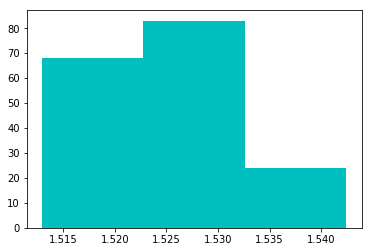

In [72]:
plt.hist(stress2, bins=60, color = 'c', range=[-1.6, 12.6])

Este histograma tambien se puede dividir en tres rangos que corresponden al nivel de estres Bajo, Medio o Alto,

In [ ]:
plt.hist(stress2, bins=3, color = 'm', range=[-1.6, 12.6])

Promedio del VSP para la simulacion

In [70]:
np.mean(vsp)


0.8240146856890536

Promedio del Stress para la simulacion

In [71]:
np.mean(st)

7.0540348332409675

Como ejemplo, se grafica las medias del VSP para cada vehiculo en una simulacion

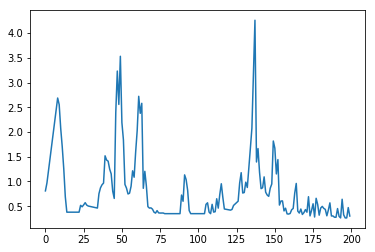

In [73]:
plt.plot(vsp)

Como ejemplo, se grafica las medias del Stress para cada vehiculo en una simulacion

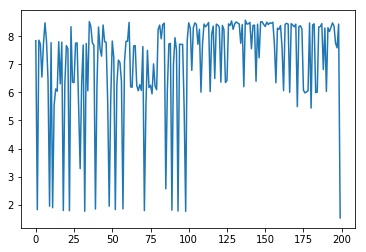

In [74]:
plt.plot(st)

A continuacion se guardan los valores arrojados para VSP y Stress promedio de cada simulacion para comparar la influencia del cambio de parametros en cada simulacion. 

### Para un numero de calles de 10 en ambos sentidos

Velocidades maximas de analisis

In [75]:
velocidades = [10, 20, 30, 40, 50, 70] # km/hr

Tamaño de calles en la simulacion

In [ ]:
tamcalles= 50

Se guardan los calores del VSP y Stress promedio de las simulaciones

In [76]:
vsp0 = [0.7834511349361981, 3.3442723070353453, 5.395927759309825, 9.778574436580435, 11.128549878793715, 17.25075014836979]

In [77]:
vsp1 = [0.82]

In [78]:
stress1 = [7.05]

tamcalles=200

In [79]:
vsp02 = [0.6981081737687731, 1.61955572548649, 3.24016369816487, 5.238046976011572, 7.45981231609558, 12.77613096975363]

In [80]:
vsp2 = []

In [81]:
stress2 = []

Se generan las graficas finales de comparacion

In [82]:
'''plt.plot(velocidades, vsp)
plt.plot(velocidades2, vsp2)'''

'plt.plot(velocidades, vsp)\nplt.plot(velocidades2, vsp2)'

In [83]:
'''
with open('posicionesx.csv', mode = 'w') as file:
    writer = csv.writer(file)
    for i in range(0, nautos):
        writer.writerow(posicionx[:][i])
        
with open('posicionesy.csv', mode = 'w') as file:
    writer = csv.writer(file)
    for i in range(0, nautos):
        writer.writerow(posiciony[:][i])    
        '''

"\nwith open('posicionesx.csv', mode = 'w') as file:\n    writer = csv.writer(file)\n    for i in range(0, nautos):\n        writer.writerow(posicionx[:][i])\n        \nwith open('posicionesy.csv', mode = 'w') as file:\n    writer = csv.writer(file)\n    for i in range(0, nautos):\n        writer.writerow(posiciony[:][i])    \n        "